# i. Perkenalan

# ii. Import Libraries

In [24]:
# Import Statistics Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr

# Sklearn Libraries for Classification ML
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap

# from xgboost import XGBClassifier

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
# from tensorflow.keras.backend import clear_session
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.metrics import Recall
# from tensorflow.random import set_seed

import time

# Save and Load Libraries
import pickle

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [25]:
# Load data untuk dataset EDA
df = pd.read_csv('dataset/P2_FinPro_Final_Record.csv')
df

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_status,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,X,2021-09-01,2021-09-01,0,NPL,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,0,2021-09-01,2021-10-01,-1,NPL,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,1,2021-09-01,2021-11-01,-2,NPL,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2021-12-01,-3,NPL,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-01-01,-4,NPL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777542,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-08-01,-9,NPL,1
777543,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-09-01,-10,NPL,1
777544,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-10-01,-11,NPL,1
777545,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-11-01,-12,NPL,1


## Mengecek ukuran dataset

In [26]:
print(f'Datase ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Datase ini memiliki 777547 baris dan 23 kolom


## Mengecek informasi dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777547 entries, 0 to 777546
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              777547 non-null  int64  
 1   gender          777547 non-null  object 
 2   car             777547 non-null  object 
 3   realty          777547 non-null  object 
 4   child_number    777547 non-null  int64  
 5   income          777547 non-null  float64
 6   occupation      777547 non-null  object 
 7   education       777547 non-null  object 
 8   marital_status  777547 non-null  object 
 9   house_type      777547 non-null  object 
 10  days_birth      777547 non-null  int64  
 11  days_employed   777547 non-null  int64  
 12  mobile_phone    777547 non-null  int64  
 13  work_phone      777547 non-null  int64  
 14  phone           777547 non-null  int64  
 15  email           777547 non-null  int64  
 16  family_size     777547 non-null  float64
 17  status    

## Mengecek statistik sederhana dataset

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,777547.0,5.078753e+06,41802.536165,5008804.0,5044633.0,5069532.0,5115552.0,5150487.0
child_number,777547.0,4.281722e-01,0.745809,0.0,0.0,0.0,1.0,19.0
income,777547.0,1.885509e+05,101625.532172,27000.0,121500.0,162000.0,225000.0,1575000.0
days_birth,777547.0,-1.612422e+04,4104.141492,-25152.0,-19452.0,-15759.0,-12716.0,-7489.0
days_employed,777547.0,5.776413e+04,136461.382677,-15713.0,-3292.0,-1682.0,-431.0,365243.0
mobile_phone,777547.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,777547.0,2.318381e-01,0.422006,0.0,0.0,0.0,0.0,1.0
phone,777547.0,3.010275e-01,0.458705,0.0,0.0,0.0,1.0,1.0
email,777547.0,9.169478e-02,0.288595,0.0,0.0,0.0,0.0,1.0
family_size,777547.0,2.208947e+00,0.907422,1.0,2.0,2.0,3.0,20.0


## Mengecek missing value

In [29]:
df.isna().sum()

id                0
gender            0
car               0
realty            0
child_number      0
income            0
occupation        0
education         0
marital_status    0
house_type        0
days_birth        0
days_employed     0
mobile_phone      0
work_phone        0
phone             0
email             0
family_size       0
status            0
start_date        0
snapshot_month    0
months_balance    0
credit_status     0
target            0
dtype: int64

## Mengecek data duplikat

In [30]:
print(f'Terdapat {df.duplicated().sum()} data duplikat')

Terdapat 0 data duplikat


# v. Feature Engineering

## Handling Outlier

Seperti yang diketahui saat EDA bahwa pada days employed terdapat data pekerja yang tidak masuk akal, sehingga days employed akan diubah ke 0

In [31]:
df[df['days_employed'] > 0]

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_status,target
137,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,1.0,X,2021-04-01,2021-04-01,0,Good Credit,0
138,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,1.0,0,2021-04-01,2021-05-01,-1,Good Credit,0
139,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,1.0,0,2021-04-01,2021-06-01,-2,Good Credit,0
140,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,1.0,0,2021-04-01,2021-07-01,-3,Good Credit,0
141,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,1.0,0,2021-04-01,2021-08-01,-4,Good Credit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777160,5148602,M,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,2.0,0,2021-09-01,2022-08-01,-11,NPL,1
777161,5148602,M,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,2.0,0,2021-09-01,2022-09-01,-12,NPL,1
777162,5148602,M,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,2.0,0,2021-09-01,2022-10-01,-13,NPL,1
777163,5148602,M,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,2.0,0,2021-09-01,2022-11-01,-14,NPL,1


In [32]:
df.loc[df['days_employed'] > 0, 'days_employed'] = 0

In [33]:
df[df['days_employed'] > 0]

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_status,target


## Feature Creation

#### Age

Mengubah days_birth menjadi age

In [34]:
df['age'] = (-df['days_birth'] // 365)


#### Years of Employment

In [35]:
df['years_employed'] = df['days_employed'].apply(lambda x: 0 if x > 0 else int(-x // 365))

#### Education Income Ratio

In [36]:
edu_order = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df['education_ordinal'] = df['education'].map(edu_order)

In [37]:
df['education_income_ratio'] = df['education_ordinal'] / df['income']

### Income per Person

Formula: income / family_size

Relationship to credit approval:

The higher the income per person, the better the repayment capacity, increasing the likelihood of credit approval

In [38]:
df['income_per_person'] = df['income'] / df['family_size'].replace(0, 1)

### low income ?

Formula:
1 if income < median_income, else 0

Reason:

Applicants below median income are considered to have relatively limited financial resources compared to the population

Relationship to Credit Approval:

Lower income correlates with reduced repayment ability, leading to higher perceived risk for lenders

In [39]:
median_income = df['income'].median()
median_income

162000.0

In [40]:
df['low_income'] = (df['income'] < median_income).astype(int)

### Financial Dependence Ratio

Formula:

family_size / (1 + child_number)<br/>
(Avoid division by zero; if no children, denominator = 1)

Reason:

This captures the proportion of adults vs dependents in the household. A lower ratio suggests fewer adults supporting more dependents

In [41]:
df['financial_dependence_ratio'] = df['family_size']/(1 + df['child_number'])

Fitur yang dihapus karena sudah digantikan oleh fitur lain

### House Type per Income

In [42]:
house_type_order = {
    'With parents': 0,
    'Municipal apartment': 1,
    'Rented apartment': 2,
    'Office apartment': 3,
    'House / apartment': 4,
    'Co-op apartment': 5
}

df['house_type_ordinal'] = df['house_type'].map(house_type_order)

df['house_income_ratio'] = df['house_type_ordinal'] / df['income']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777547 entries, 0 to 777546
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          777547 non-null  int64  
 1   gender                      777547 non-null  object 
 2   car                         777547 non-null  object 
 3   realty                      777547 non-null  object 
 4   child_number                777547 non-null  int64  
 5   income                      777547 non-null  float64
 6   occupation                  777547 non-null  object 
 7   education                   777547 non-null  object 
 8   marital_status              777547 non-null  object 
 9   house_type                  777547 non-null  object 
 10  days_birth                  777547 non-null  int64  
 11  days_employed               777547 non-null  int64  
 12  mobile_phone                777547 non-null  int64  
 13  work_phone    

In [44]:
df = df.drop(columns=['id', 'education', 'days_birth', 'days_employed', 'target', 'status', 'mobile_phone', 'family_size', 'income', 'marital_status', 'education_ordinal', 'house_type', 'house_type_ordinal'])

In [45]:
cat_cols = ['gender', 'car', 'realty', 'occupation']
num_cols = ['months_balance', 'age', 'years_employed', 'education_income_ratio', 'income_per_person', 'financial_dependence_ratio', 'house_income_ratio', 'child_number']
exclude_cols = ['work_phone', 'email', 'phone', 'low_income']

num_cols = [col for col in num_cols if col not in exclude_cols]

print(num_cols)
print(cat_cols)
print(exclude_cols)

['months_balance', 'age', 'years_employed', 'education_income_ratio', 'income_per_person', 'financial_dependence_ratio', 'house_income_ratio', 'child_number']
['gender', 'car', 'realty', 'occupation']
['work_phone', 'email', 'phone', 'low_income']


Mengubah fitur credit_approval (target) menjadi binary

In [46]:
df['credit_status'] = df['credit_status'].map({'Good Credit': 0, 'NPL':1})

## Handling Cardinality

In [47]:
# Set display untuk filter kolom nantinya
pd.set_option('display.max_colwidth', None)

listCols = []
for col in cat_cols:
    listCols.append([col, df[col].nunique(), df[col].unique()])


pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Nilai Unique'], data=listCols)

,Nama Kolom,Jumlah Nilai Unique,Nilai Unique
0,gender,2,"[M, F]"
1,car,2,"[Y, N]"
2,realty,2,"[Y, N]"
3,occupation,5,"[Working, Commercial associate, Pensioner, State servant, Student]"


## Split fitur dan target

In [48]:
# Splitting antara X dan Y
X = df.drop(['credit_status'], axis=1) # Features
y = df['credit_status'] # Target

In [49]:
X.head()

,gender,car,realty,child_number,occupation,work_phone,phone,email,start_date,snapshot_month,months_balance,age,years_employed,education_income_ratio,income_per_person,low_income,financial_dependence_ratio,house_income_ratio
0,M,Y,Y,0,Working,1,0,0,2021-09-01,2021-09-01,0,32,12,0.000009,213750.0,0,2.0,0.000005
1,M,Y,Y,0,Working,1,0,0,2021-09-01,2021-10-01,-1,32,12,0.000009,213750.0,0,2.0,0.000005
2,M,Y,Y,0,Working,1,0,0,2021-09-01,2021-11-01,-2,32,12,0.000009,213750.0,0,2.0,0.000005
3,M,Y,Y,0,Working,1,0,0,2021-09-01,2021-12-01,-3,32,12,0.000009,213750.0,0,2.0,0.000005
4,M,Y,Y,0,Working,1,0,0,2021-09-01,2022-01-01,-4,32,12,0.000009,213750.0,0,2.0,0.000005


In [50]:
y.unique()

array([1, 0])

## Split train set dan test set

In [51]:
# Splitting antara train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (622037, 18)
Test Size (155510, 18)


## Penangan Data Outlier

In [52]:
# Display skewness distributions and outliers

# Buat dataframe skewness dahulu dari kolom numerik
listCols2= []
for col in num_cols:
  listCols2.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),2) <= 0.5) & (round(X_train[col].skew(),2) >= -0.5),
    'normal','skewed')])

skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Distribution'], data= listCols2)
skewness

# Buat dataframe persentase outliers dahulu dari kolom numerik
column = []
lower_bound = []
upper_bound = []
Percentage_Outliers = []
for row in range (0, len(skewness)):
  col = skewness['Nama Kolom'][row]
  #checking upper and lower boundary
  if skewness['Distribution'][row] == 'Skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  Percentage_Outliers.append(totout)


outliers = pd.DataFrame({
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'Percentage Outliers': [round(Percentage_Outliers,2) for Percentage_Outliers in Percentage_Outliers],   
})

# Concat and Merge the two
frames = [skewness, outliers]
Skewness_Outliers = pd.concat(frames, ignore_index=False, axis=1)
Skewness_Outliers

,Nama Kolom,Nilai Skewness,Distribution,upper_boundary,lower_boundary,Percentage Outliers
0,months_balance,-0.9,skewed,22.53,-53.29,0.51
1,age,0.2,normal,77.39,9.94,0.00
2,years_employed,1.7,skewed,25.79,-13.89,2.03
3,education_income_ratio,2.3,skewed,0.00,-0.00,1.29
4,income_per_person,2.7,skewed,316141.65,-115350.53,1.51
5,financial_dependence_ratio,-0.5,normal,2.87,0.39,0.01
6,house_income_ratio,1.4,skewed,0.00,-0.00,1.17
7,child_number,2.5,skewed,2.66,-1.81,1.43


In [53]:
num_cols_normal = ['financial_dependence_ratio', 'age']
num_cols_skewed = [ 'months_balance',
                    'years_employed',
                    'education_income_ratio',
                    'income_per_person',
                    'house_income_ratio']

# Model Training

In [54]:
# Definisikan pipeline untuk numerikal kolom dataset 2
num_transformer_normal = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

num_transformer_skewed = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Definisikan pipeline untuk kategorikal kolom dataset 2
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline untuk preprocessing dataset 2
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('numerical_normal', num_transformer_normal, num_cols_normal),
    ('numerical_skewed', num_transformer_skewed, num_cols_skewed),
    ('categorical', cat_transformer, cat_cols),
    ('num_passthrough', 'passthrough', exclude_cols)
])

In [55]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numerical_normal',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['financial_dependence_ratio', 'age']),
                                ('numerical_skewed',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['months_balance', 'years_employed',
                                  'education_income_ratio', 'income_per_person',
                                  'house_income_ratio']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'car', 'realty', 'occupation']),
                                ('num_passthrough', 'passthrough',
                                 ['work_phone', 'email', 'phone',
                                  'low_income'])])

In [70]:
# Pipeline dengan KNN Classifier
pipeknn = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('knn', KNeighborsClassifier())
])

# Pipeline dengan Decision Tree Classifier
pipedt = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('decisiontree', DecisionTreeClassifier(splitter='best', min_samples_split=20, min_samples_leaf=20, max_features='sqrt', class_weight={0:1, 1:4.5}, random_state=42))
])

# Pipeline dengan Random Forest Classifier
piperf= Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('randomforest', RandomForestClassifier(n_estimators=200, min_samples_split=20, min_samples_leaf=20, max_features='sqrt', n_jobs=-1, class_weight={0:0.5, 1:4}, random_state=42))
])

pipehgb= Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('HGB', HistGradientBoostingClassifier(max_iter=175, max_depth=90, class_weight='balanced', min_samples_leaf=10, learning_rate=0.2, max_leaf_nodes=175))
])

pipelgbm=Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('LGBM', LGBMClassifier(class_weight='balanced',
    learning_rate=0.2,
    min_child_samples=10,   # equivalent to min_samples_leaf
    n_estimators=175,       # equivalent to max_iter
    random_state=42,
    num_leaves=175,
    max_depth=90))
])

# **Melatih model**
pipeknn.fit(X_train, y_train)
pipedt.fit(X_train, y_train)
piperf.fit(X_train, y_train)
pipehgb.fit(X_train, y_train)
pipelgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 87522, number of negative: 534515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 622037, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_normal',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['financial_dependence_ratio',
                                                   'age']),
                                                 ('numerical_skewed',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['months_balance',
                                                   'years_employed',
                                                   'education_income_ratio',
                                                   'income_...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'car', 'realty',
                                                   'occupation']),
                                                 ('num_passthrough',
                                                  'passthrough',
                                                  ['work_phone', 'email',
                                                   'phone', 'low_income'])])),
                ('LGBM',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.2,
                                max_depth=90, min_child_samples=10,
                                n_estimators=175, num_leaves=175,
                                random_state=42))])

In [57]:
# Fungsi Penilaian ROC AUC
def calculate_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:,1]
    fpr, tpr,_ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    if auc > 0.9:
        desc = 'Good'
    elif auc >= 0.8:
        desc = 'Fair'
    elif auc >= 0.7:
        desc = 'Decent'
    elif auc >= 0.6:
        desc = 'Not Great'
    else:
        desc = 'Poor'

    return auc, desc, fpr, tpr

In [58]:
y_pred_train_dt = pipedt.predict(X_train)
y_pred_test_dt = pipedt.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_dt))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_dt))

Train
              precision    recall  f1-score   support

           0       0.98      0.86      0.91    534515
           1       0.50      0.89      0.64     87522

    accuracy                           0.86    622037
   macro avg       0.74      0.87      0.78    622037
weighted avg       0.91      0.86      0.88    622037


Test
              precision    recall  f1-score   support

           0       0.97      0.85      0.91    133630
           1       0.48      0.85      0.62     21880

    accuracy                           0.85    155510
   macro avg       0.73      0.85      0.76    155510
weighted avg       0.90      0.85      0.87    155510



In [71]:
y_pred_train_rf = piperf.predict(X_train)
y_pred_test_rf = piperf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_rf))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_rf))

Train
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    534515
           1       0.49      0.97      0.66     87522

    accuracy                           0.86    622037
   macro avg       0.74      0.90      0.78    622037
weighted avg       0.92      0.86      0.87    622037


Test
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    133630
           1       0.49      0.95      0.64     21880

    accuracy                           0.85    155510
   macro avg       0.74      0.89      0.78    155510
weighted avg       0.92      0.85      0.87    155510



In [60]:
y_pred_train_hgb = pipehgb.predict(X_train)
y_pred_test_hgb = pipehgb.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_hgb))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_hgb))

Train
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    534515
           1       0.52      0.96      0.67     87522

    accuracy                           0.87    622037
   macro avg       0.76      0.91      0.80    622037
weighted avg       0.93      0.87      0.88    622037


Test
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    133630
           1       0.51      0.94      0.66     21880

    accuracy                           0.87    155510
   macro avg       0.75      0.90      0.79    155510
weighted avg       0.92      0.87      0.88    155510



In [61]:
y_pred_train_lgbm = pipelgbm.predict(X_train)
y_pred_test_lgbm = pipelgbm.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train_lgbm))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_lgbm))

Train
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    534515
           1       0.52      0.96      0.68     87522

    accuracy                           0.87    622037
   macro avg       0.76      0.91      0.80    622037
weighted avg       0.93      0.87      0.88    622037


Test
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    133630
           1       0.52      0.94      0.67     21880

    accuracy                           0.87    155510
   macro avg       0.75      0.90      0.79    155510
weighted avg       0.92      0.87      0.88    155510



In [ ]:
# with open('model_hgb.pkl', 'wb') as file:
#        pickle.dump(pipehgb, file)

In [ ]:
# with open('model_rf.pkl', 'wb') as file:
#        pickle.dump(piperf, file)

In [64]:
with open('model_lgbm.pkl', 'wb') as file:
       pickle.dump(pipelgbm, file)

# Model Evaluation 

In [65]:
# Extract components
lgbm_model = pipelgbm.named_steps['LGBM']
preprocessor = pipelgbm.named_steps['preprocessor']

# Transform X_test with the preprocessor
X_test_transformed = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray() if hasattr(X_test_transformed, 'toarray') else X_test_transformed,
                                     columns=feature_names)

In [66]:
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test_transformed_df)

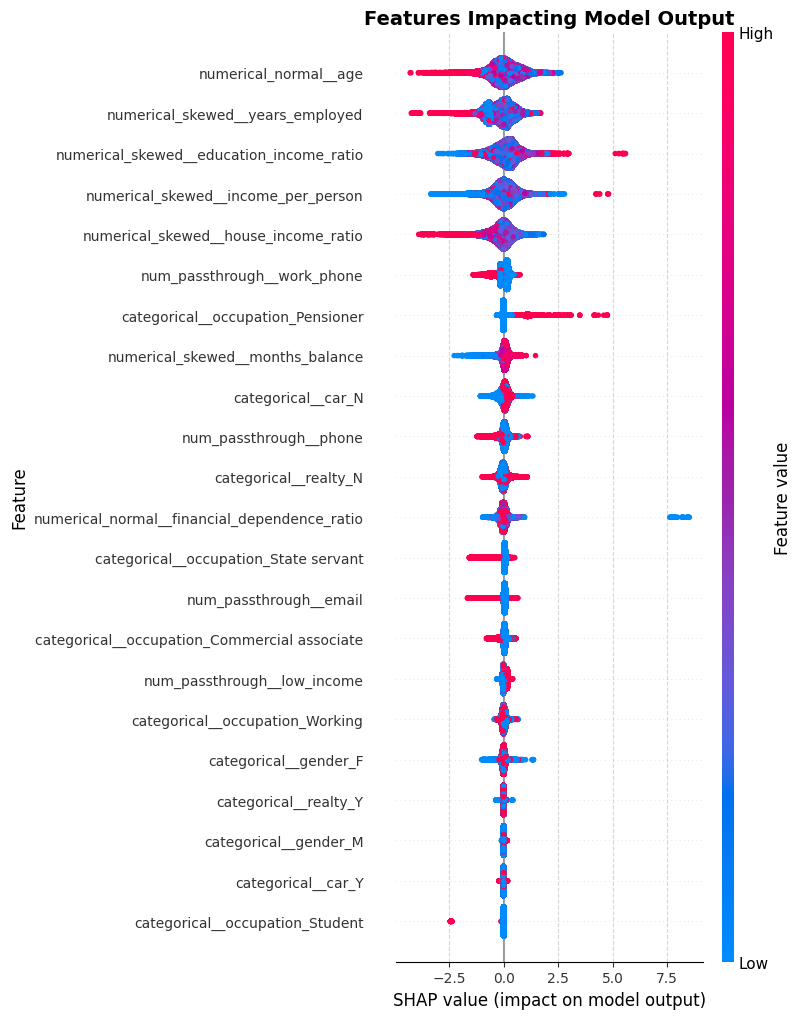

In [67]:
shap.plots.beeswarm(
    shap_values,
    max_display=24,
    show=False
)

# Customize the plot
plt.title("Features Impacting Model Output", fontsize=14, fontweight='bold')
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Model Saving

In [ ]:
# with open('model_terbaik.pkl', 'wb') as file:
#        pickle.dump(piperf, file)